In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
from matplotlib import pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 17s 36ms/step - loss: 0.3737 - accuracy: 0.8875 - val_loss: 0.0855 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.1138 - accuracy: 0.9643 - val_loss: 0.0645 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0865 - accuracy: 0.9734 - val_loss: 0.0493 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0417 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0512 - accuracy: 0.9835 - val_loss: 0.0355 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023403184488415718
Test accuracy: 0.9926999807357788


In [6]:
with open('example_model.json', 'w') as f:
    f.write(model.to_json())
    

model.save_weights('ex_weights.h5')

313/313 [==============================] - 1s 3ms/step
2.1731396e-10 ==> 0
7.0433764e-10 ==> 1
4.9911006e-07 ==> 2
9.1751945e-06 ==> 3
1.4211229e-12 ==> 4
9.986437e-10 ==> 5
8.93316e-17 ==> 6
0.9999901 ==> 7
4.159389e-09 ==> 8
1.7980595e-07 ==> 9


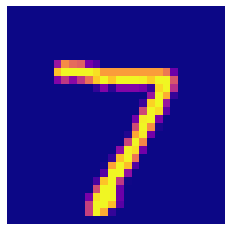

In [10]:
test  = model.predict(x_test )    
for ind, pr in enumerate(test [0]):
    print( pr, ind, sep=' ==> ')
plt.imshow(x_test [ 0], cmap='plasma')
plt.axis('off')

plt.show()